# SSH

In [1]:
import xarray as xr
import numpy as np
import my_functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

In [2]:
## load data
os.chdir('/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/')
SSH = xr.open_dataset('Data.nosync/SSH_weekly.nc')
# mid-shelf coordinates
mid_shelf_lat = np.genfromtxt('Data.nosync/CoRTAD/lat_midshelf_CoRTAD.dat')[:,1]
mid_shelf_lon = np.genfromtxt('Data.nosync/CoRTAD/lon_midshelf_CoRTAD.dat')[:,1]

In [3]:
SSH = my_functions.add_week_and_month(SSH)

In [4]:
SSH = my_functions.add_mid_shelf(SSH, mid_shelf_lat, mid_shelf_lon)

## Plot monthly means

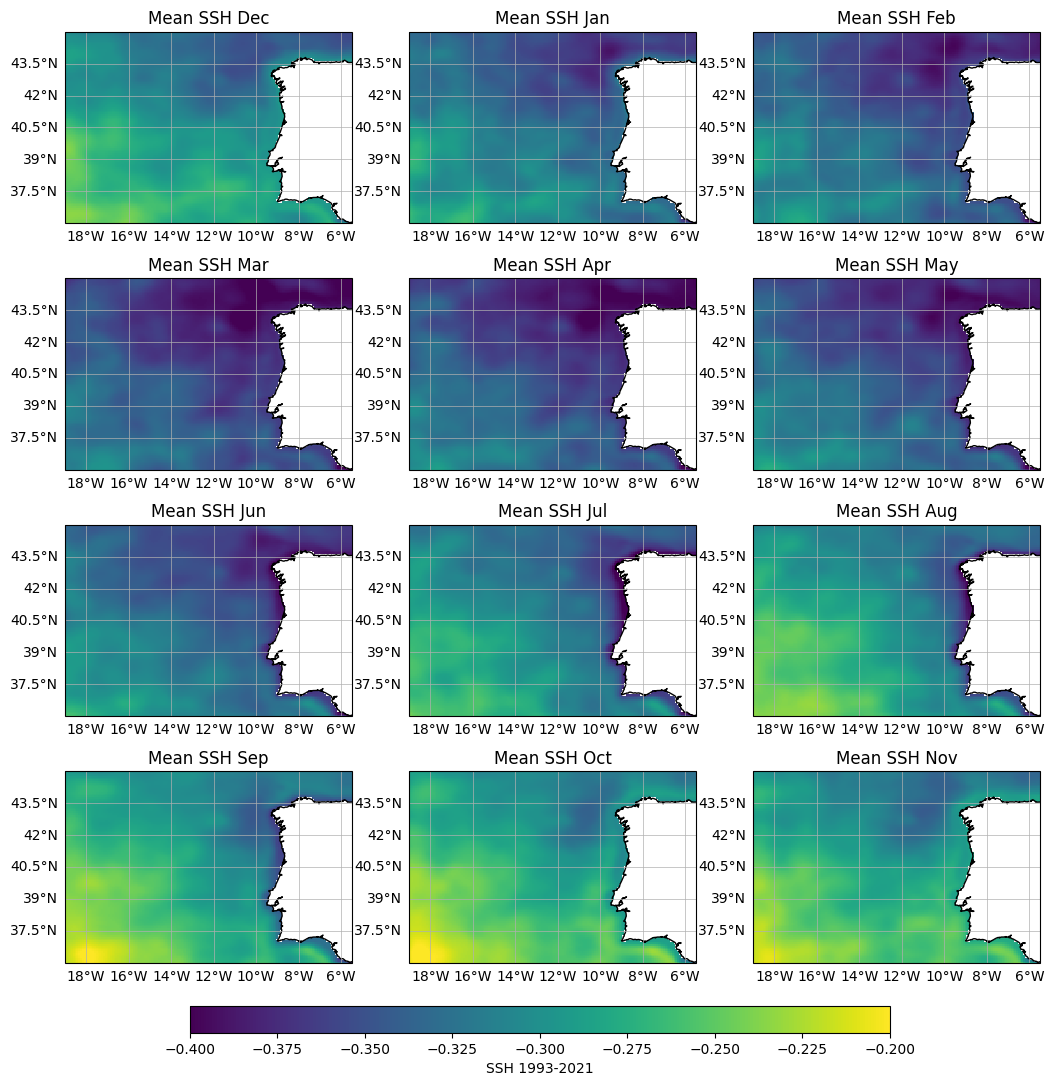

In [5]:
xsize = 4 # is actually the number of rows
ysize = 3 # is the number of collumns
fig, axs = plt.subplots(xsize, ysize, figsize = (10, 9), subplot_kw={'projection': ccrs.PlateCarree()})

months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
i = 0

for x in np.arange(0, xsize):
    for y in np.arange(0, ysize):
        
        ax = axs[x, y]
        
        ax.set_extent([-19, -5.5, 45, 36])
        ax.coastlines()
        gls = ax.gridlines(draw_labels=True, linewidth = 0.5)
        gls.top_labels = False 
        gls.right_labels = False
        
        
        cp = SSH.zos.where(SSH.month == months[i], drop = True).mean(dim = 'time').plot(ax = axs[x, y], transform = ccrs.PlateCarree(), add_colorbar = False, vmin = -0.4, vmax = -0.2, extend = 'both')
        ax.set_title(f'Mean SSH {months[i]}')
        ax.set_xlabel('Longitude [°E]')
        ax.set_ylabel('Latitude [°N]')

        i = i + 1

# adjust spacing around subplots (because fig.tight_layout() doesn't work with the method I use to add the colorbar
plt.subplots_adjust(bottom=0.5, right=1.1, top=1.3)

fig.subplots_adjust(bottom = 0.25)
cbar_ax = fig.add_axes([0.25, 0.18, 0.7, 0.03])
fig.colorbar(cp, cax=cbar_ax, orientation = 'horizontal', label = 'SSH 1993-2021')

fig.savefig('Iberian_Coast_Upwelling/Figures/SSH_monthly_mean.png', dpi = 300, bbox_inches = 'tight')

## Plot weekly means

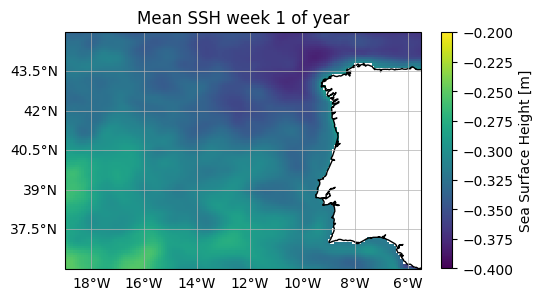

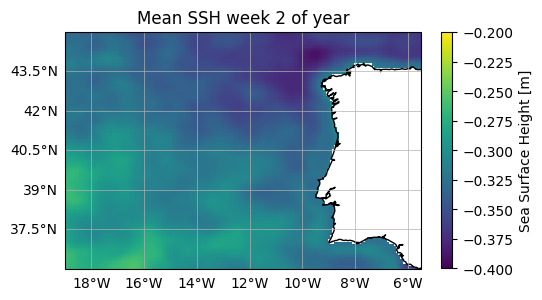

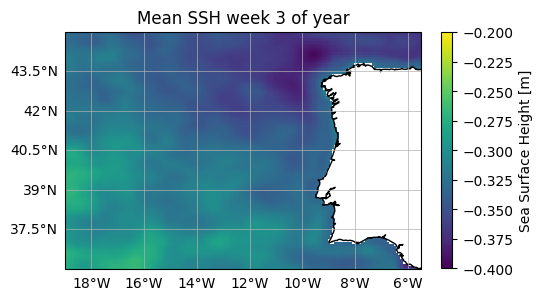

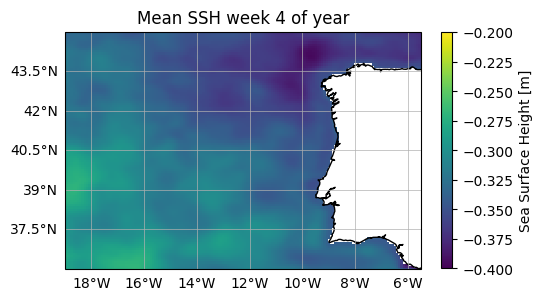

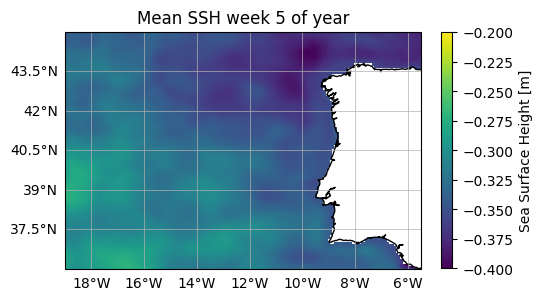

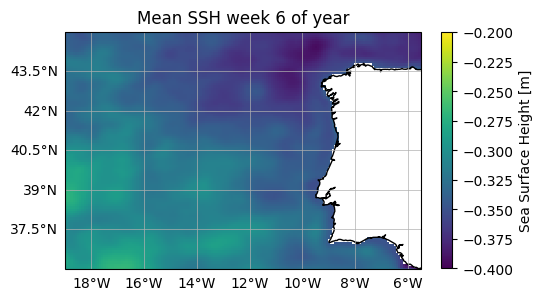

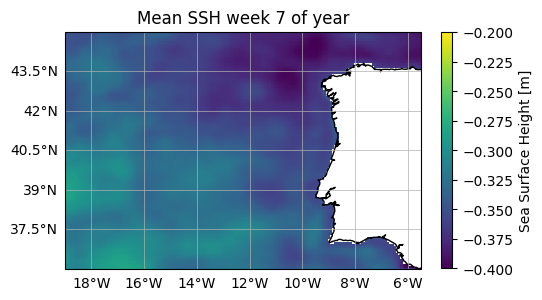

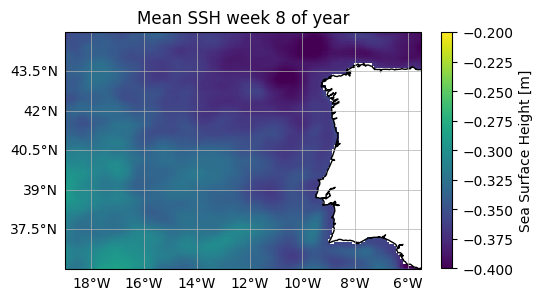

In [18]:
weeks = np.arange(1, 53)
i = 0

for week in weeks:
    fig = plt.figure(figsize = (5, 4))
    
    ax = plt.axes(projection=ccrs.PlateCarree())            
    ax.set_extent([-19, -5.5, 45, 36])
    ax.coastlines()
    gls = ax.gridlines(draw_labels=True, linewidth = 0.5)
    gls.top_labels = False 
    gls.right_labels = False
    
    
    cp = SSH.zos.where(SSH.week_of_year == week, drop = True).mean(dim = 'time').plot(transform = ccrs.PlateCarree(), add_colorbar = False, vmin = -0.4, vmax = -0.2, extend = 'both')
    plt.title(f'Mean SSH week {week} of year')
    plt.xlabel('Longitude [°E]')
    plt.ylabel('Latitude [°N]')
    plt.colorbar(cp, fraction = 0.0305, label = 'Sea Surface Height [m]')

    if week > 8:
        plt.close()
    
    fig.savefig(f'Iberian_Coast_Upwelling/Figures/SSH/SSH_weekly_mean/SSH_mean_week_{week:02d}_of_year.png', dpi = 300, bbox_inches = 'tight')

## Plot Anomaly

In [7]:
# first 20 years 1993-2011 (including)
SSH_ref = SSH.zos.sel(time = slice('1992-12-29', '2011-12-27')).mean(dim = 'time') # slice (0,992)
# ref last 9 years 2012-2021 (including)
SSH_decade = SSH.zos.sel(time = slice('2012-01-03', '2021-12-28')).mean(dim = 'time')  # slice (992, -1)

In [8]:
SSH_anomaly = SSH_ref - SSH_decade

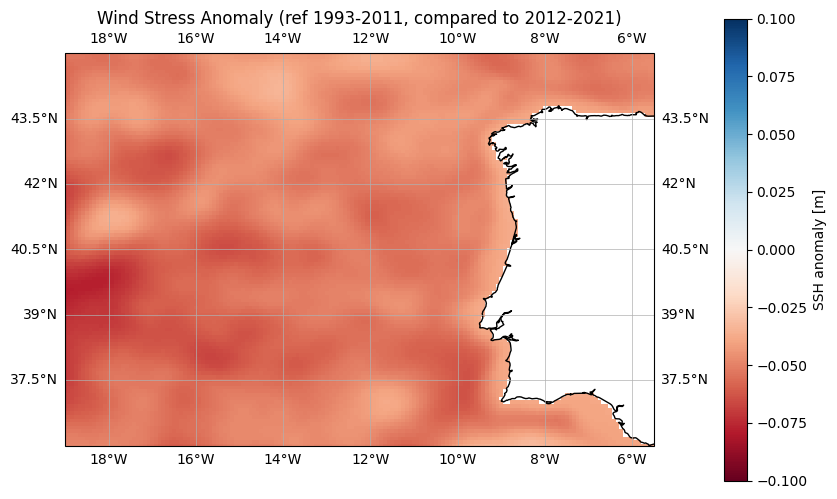

In [9]:
plt.figure(figsize=(10, 6))
    
# Set up the map 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-19, -5.5, 45, 36])
ax.gridlines(draw_labels=True, linewidth = 0.5)
ax.coastlines()
  
# plot
cp = SSH_anomaly.plot(add_colorbar = False, cmap = 'RdBu', vmin = -0.1, vmax = 0.1)
plt.title(f'Wind Stress Anomaly (ref 1993-2011, compared to 2012-2021)')
plt.colorbar(cp, ax = ax, label = r'SSH anomaly [m]', pad = 0.09);

plt.savefig('Iberian_Coast_Upwelling/Figures/SSH_anomaly.png', dpi = 300, bbox_inches = 'tight')

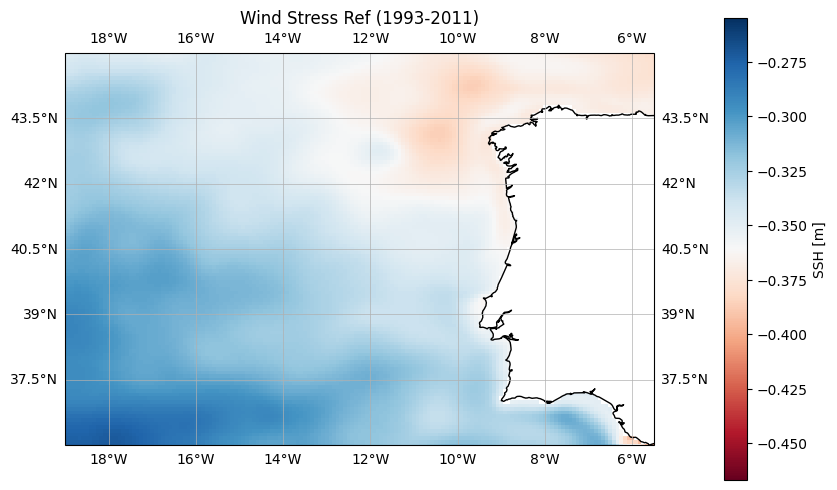

In [10]:
plt.figure(figsize=(10, 6))
    
# Set up the map 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-19, -5.5, 45, 36])
ax.gridlines(draw_labels=True, linewidth = 0.5)
ax.coastlines()
  
# plot
cp = SSH_ref.plot(add_colorbar = False, cmap = 'RdBu')
plt.title(f'Wind Stress Ref (1993-2011)')
plt.colorbar(cp, ax = ax, label = r'SSH [m]', pad = 0.09);

plt.savefig('Iberian_Coast_Upwelling/Figures/SSH_ref_period.png', dpi = 300, bbox_inches = 'tight')

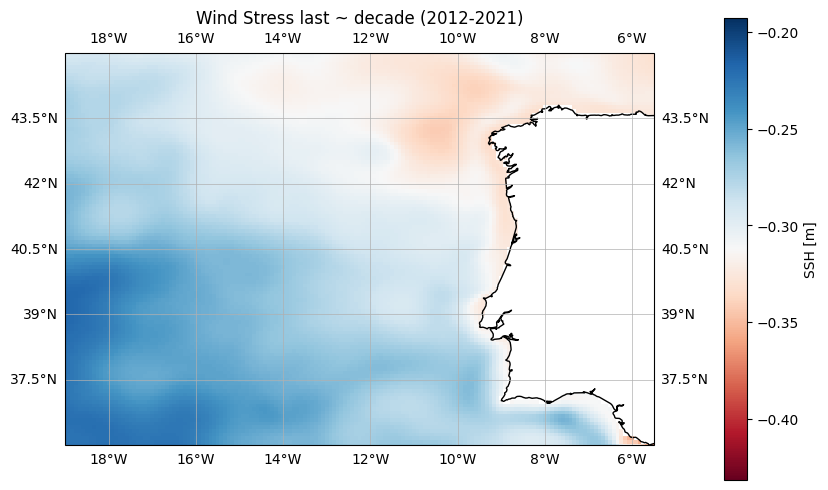

In [11]:
plt.figure(figsize=(10, 6))
    
# Set up the map 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-19, -5.5, 45, 36])
ax.gridlines(draw_labels=True, linewidth = 0.5)
ax.coastlines()
  
# plot
cp = SSH_decade.plot(add_colorbar = False, cmap = 'RdBu')
plt.title(f'Wind Stress last ~ decade (2012-2021)')
plt.colorbar(cp, ax = ax, label = r'SSH [m]', pad = 0.09);

plt.savefig('Iberian_Coast_Upwelling/Figures/SSH_last_decade.png', dpi = 300, bbox_inches = 'tight')

## Plot SSH along shore

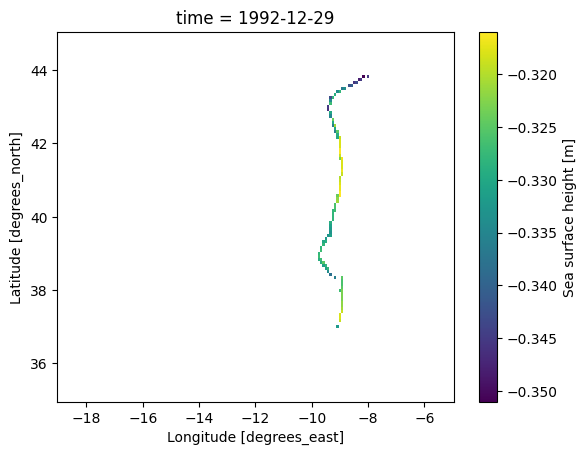

In [12]:
SSH.zos.isel(time = 0).where(SSH.mid_shelf).plot()

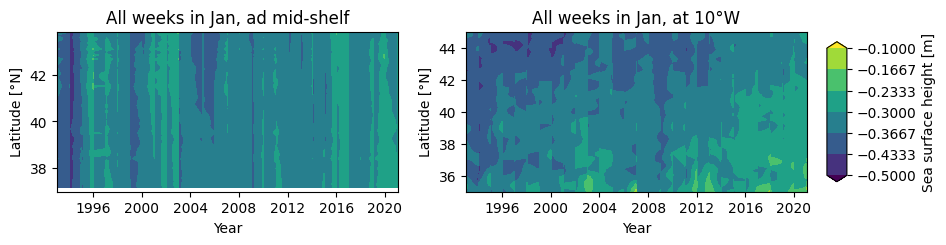

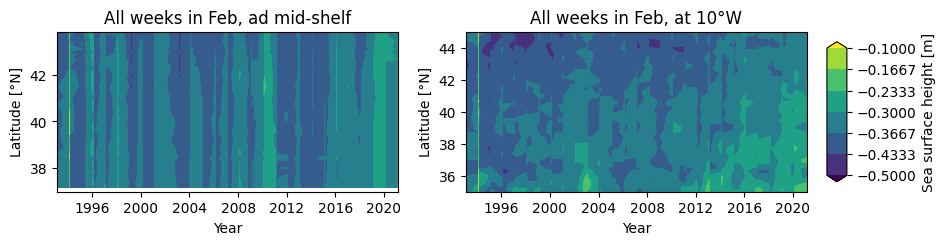

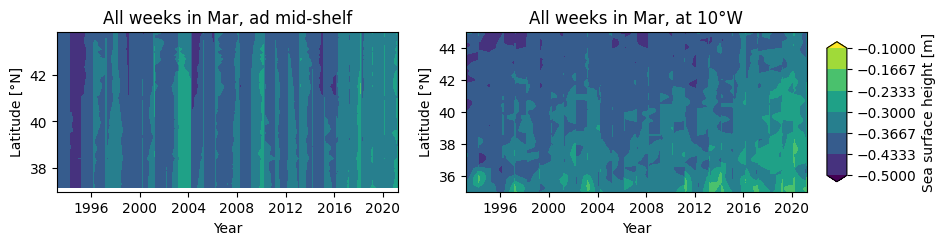

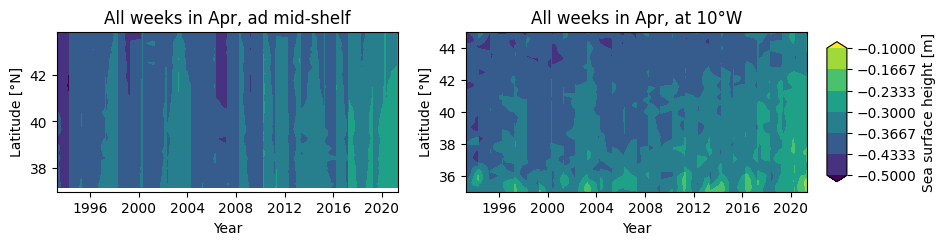

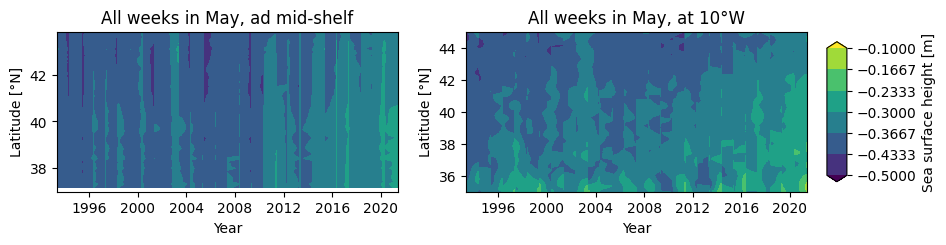

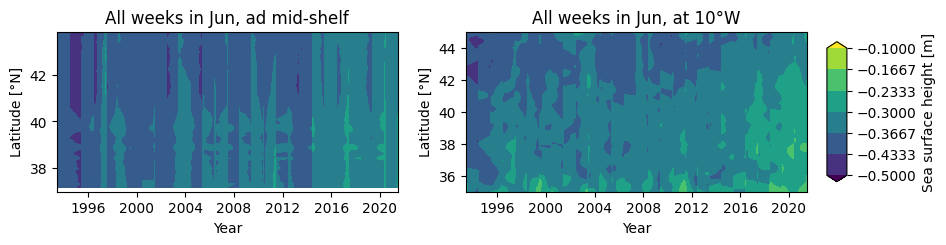

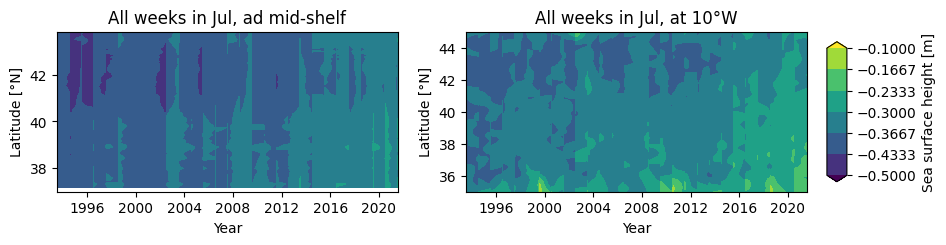

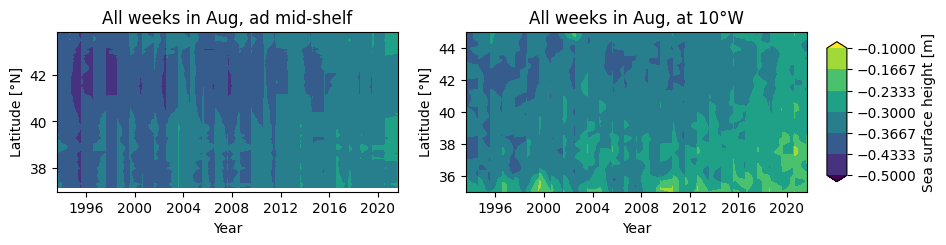

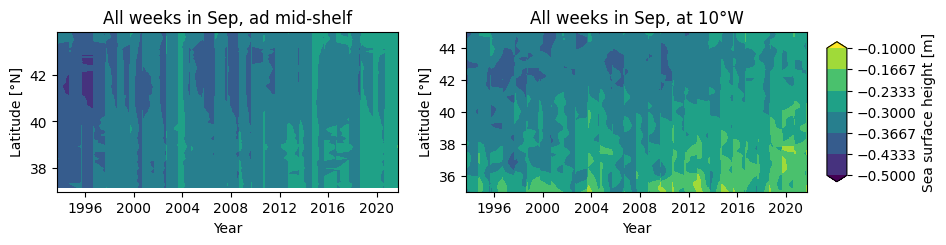

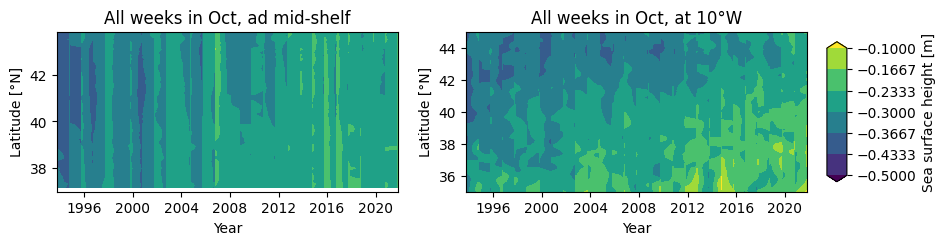

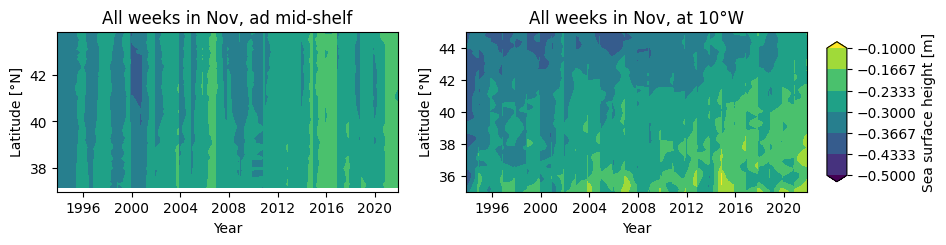

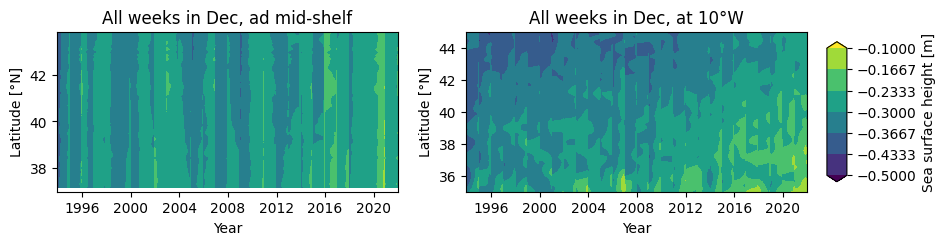

In [13]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in np.arange(0,12):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 2))
    cp1 = SSH.zos.where((SSH.month == months[i]) & (SSH.mid_shelf == True), drop = True).mean(dim = 'lon').plot.contourf(ax = ax1, y = 'lat', vmin = -0.5, vmax = -0.1, extend = 'both', add_colorbar = False)
    ax1.set_title(f'All weeks in {months[i]}, ad mid-shelf')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Latitude [°N]')

    cp2 = SSH.zos.sel(lon = -10).where((SSH.month == months[i]), drop = True).plot.contourf(ax = ax2, y = 'lat', vmin = -0.5, vmax = -0.1, extend = 'both', add_colorbar = False)
    ax2.set_title(f'All weeks in {months[i]}, at 10°W')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Latitude [°N]')

    plt.subplots_adjust(bottom=0.5, right=1.1, top=1.3)
    fig.subplots_adjust(right = 0.5)
    cbar_ax = fig.add_axes([0.51, 0.55, 0.01, 0.7])
    fig.colorbar(cp2, cax=cbar_ax, label = 'Sea surface height [m]')

    fig.savefig(f'Iberian_Coast_Upwelling/Figures/SSH/SSH_contour_{i+1:02d}.png', dpi = 300, bbox_inches = 'tight')


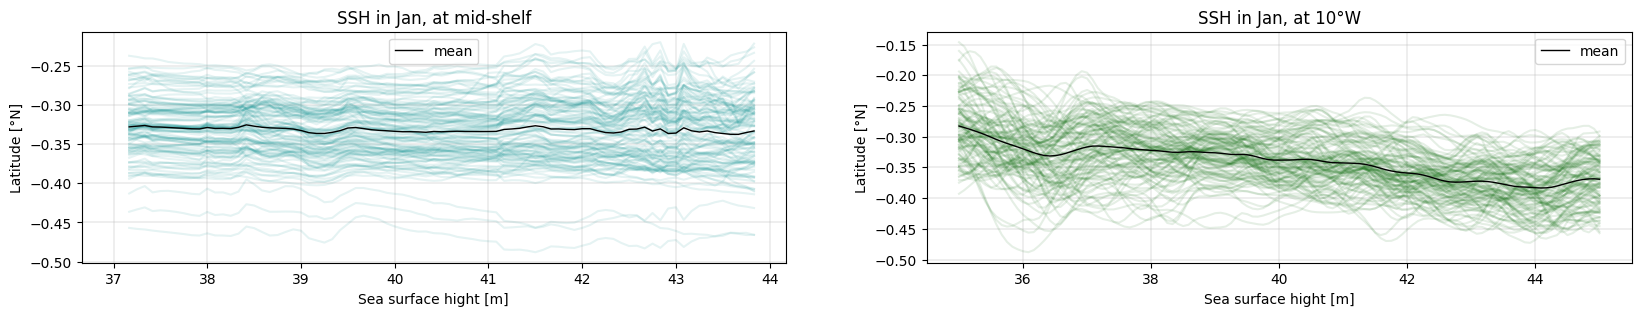

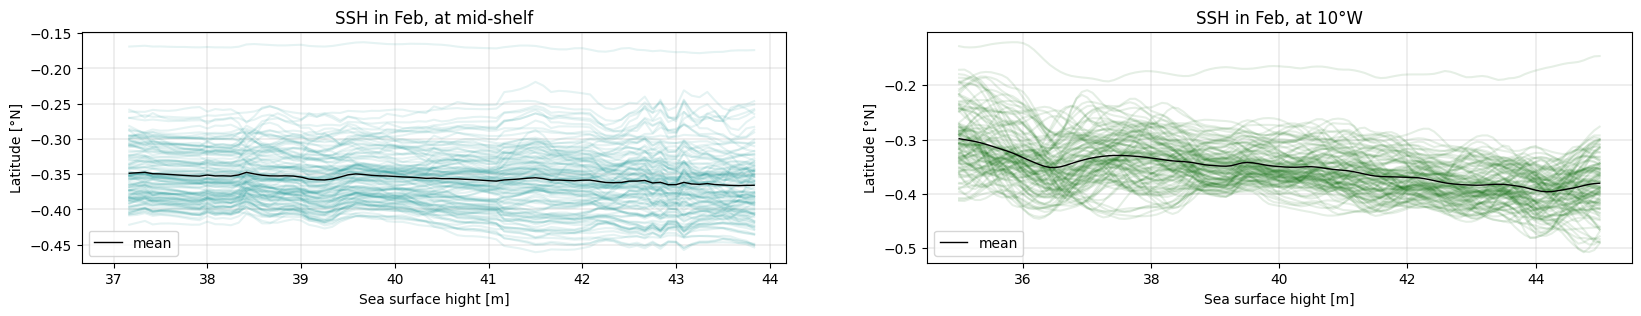

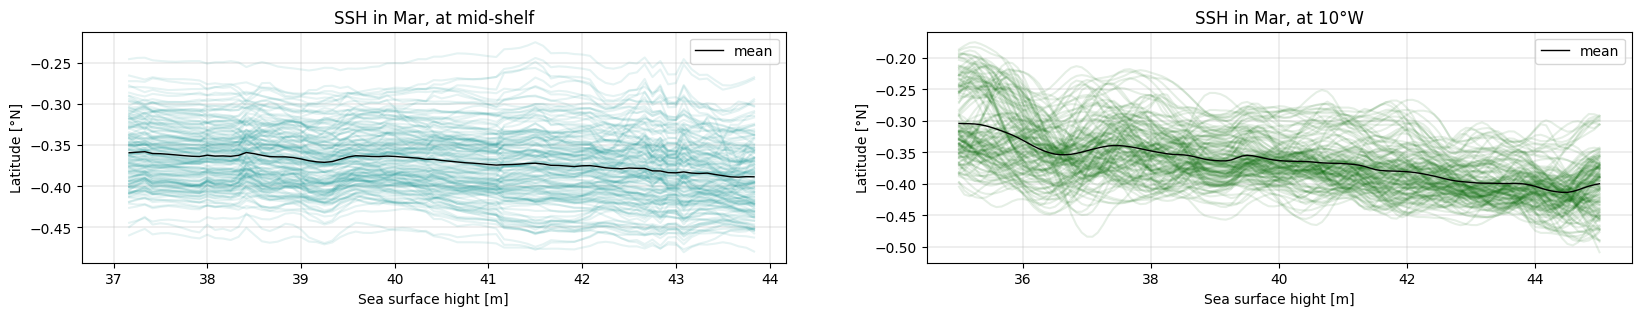

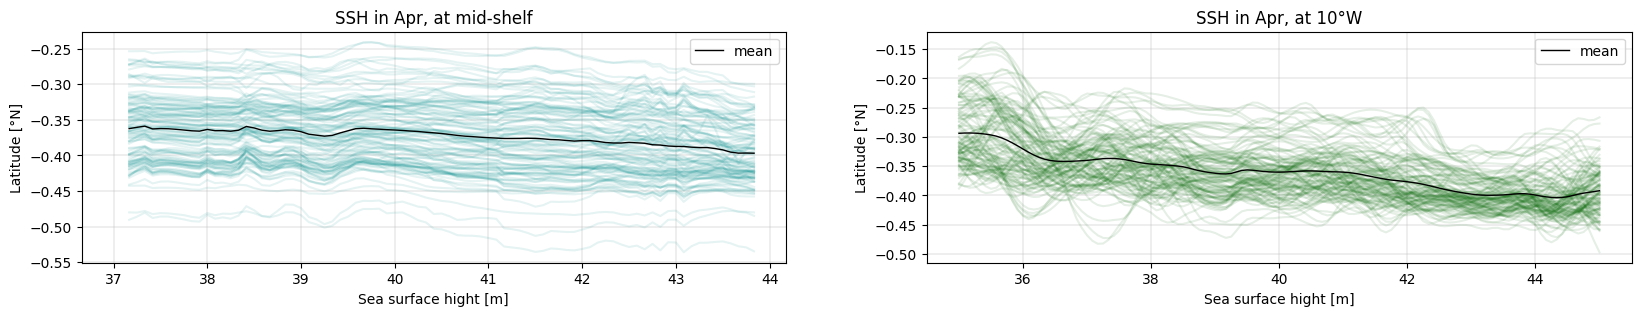

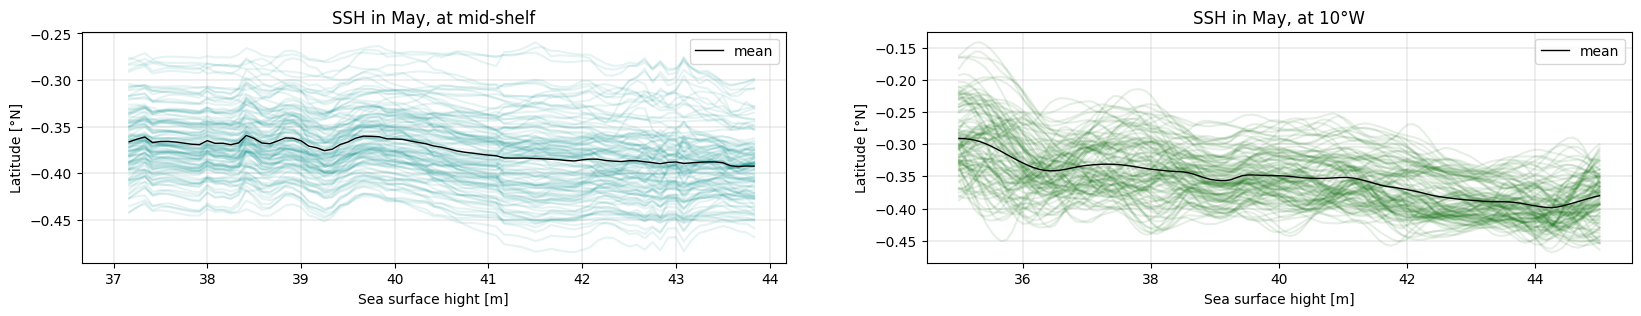

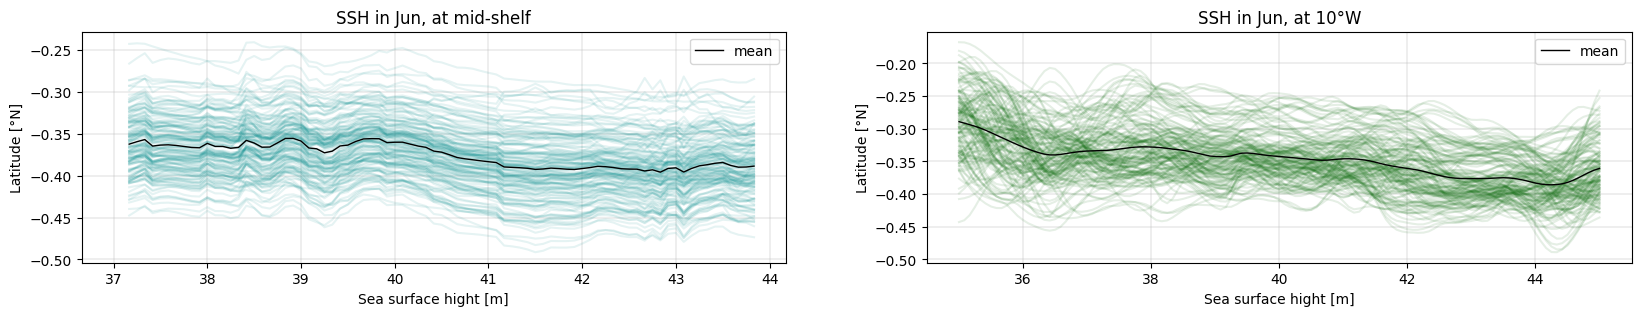

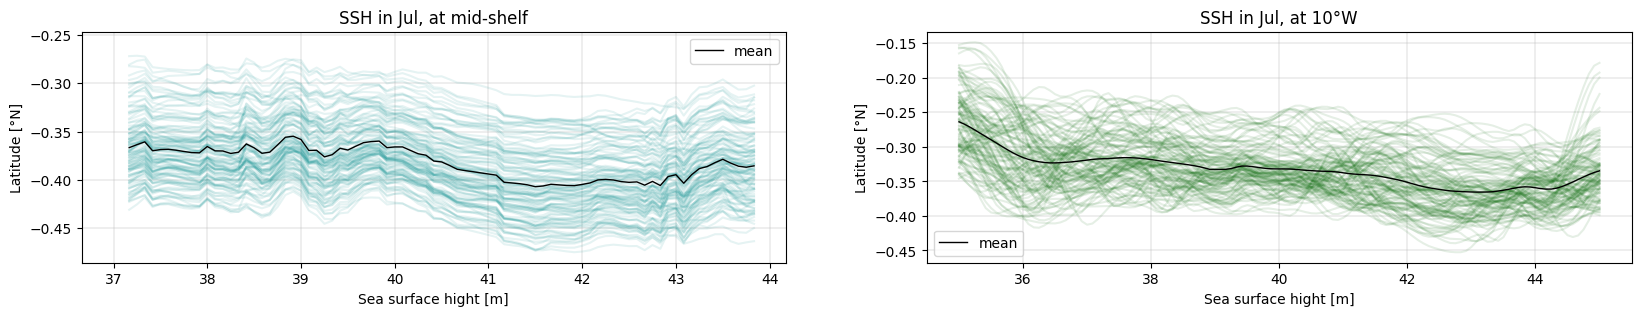

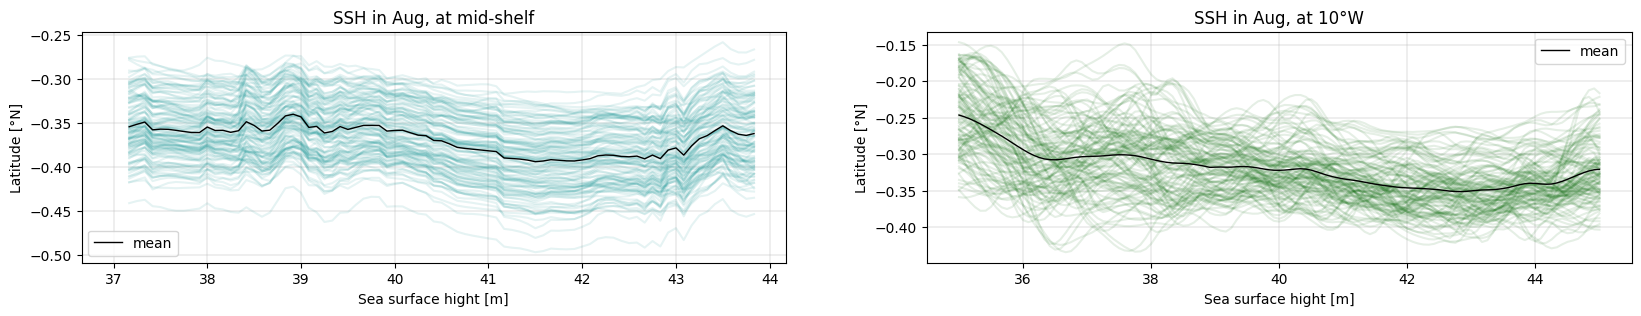

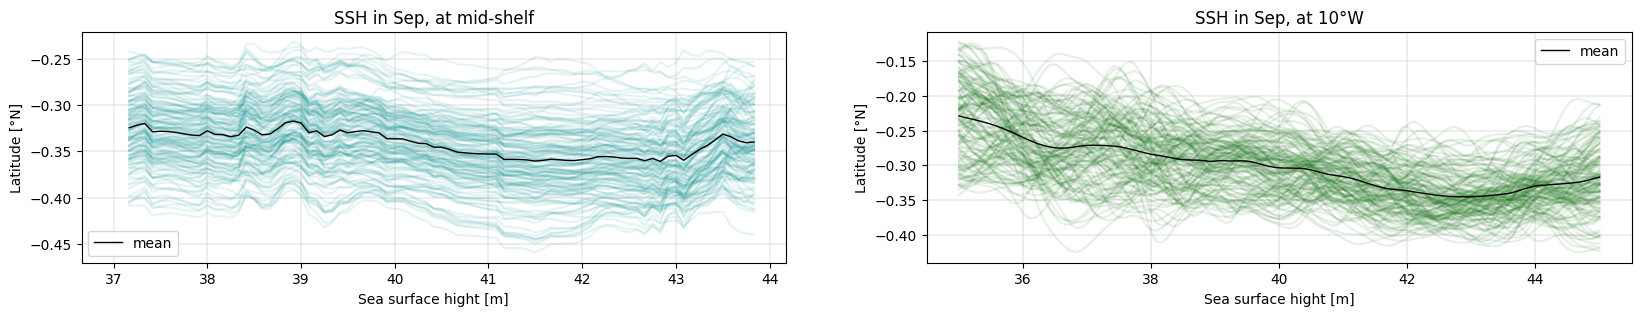

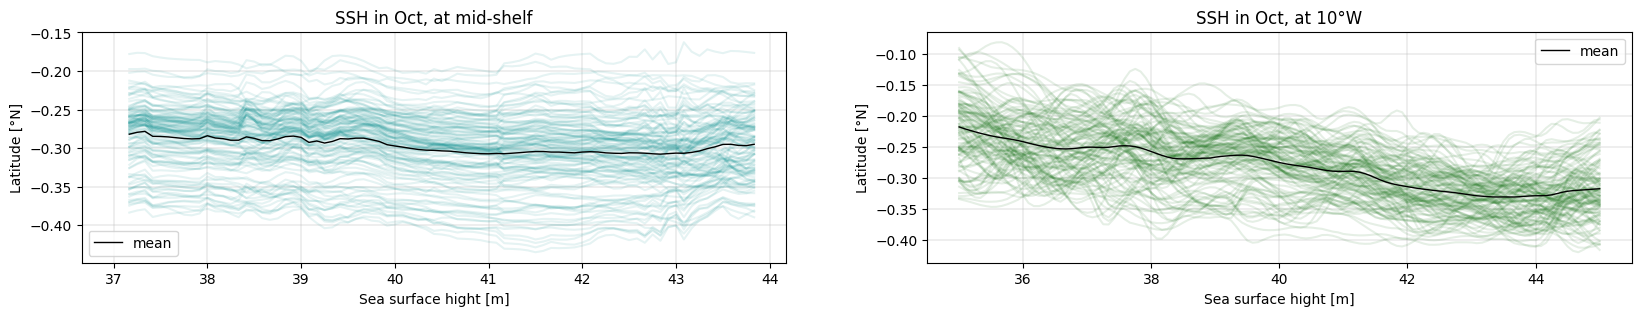

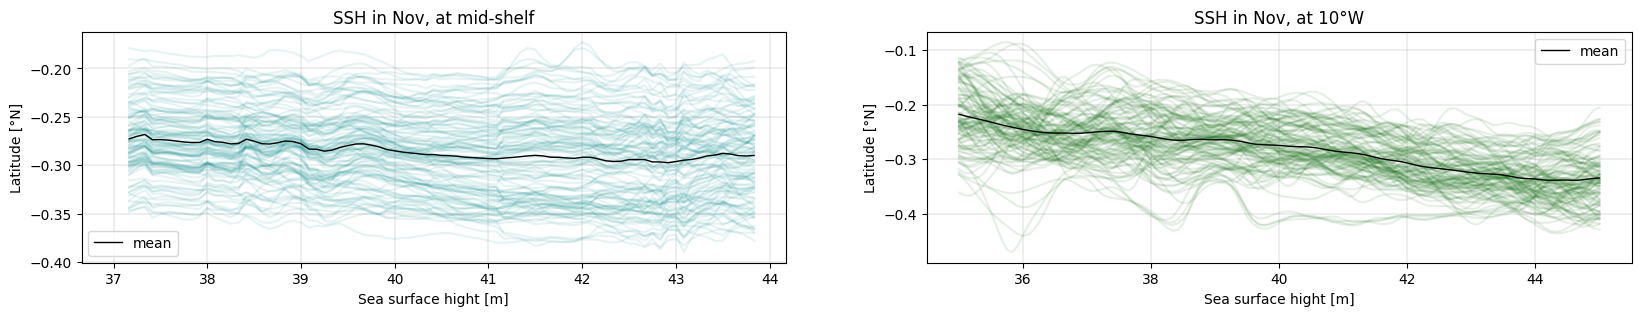

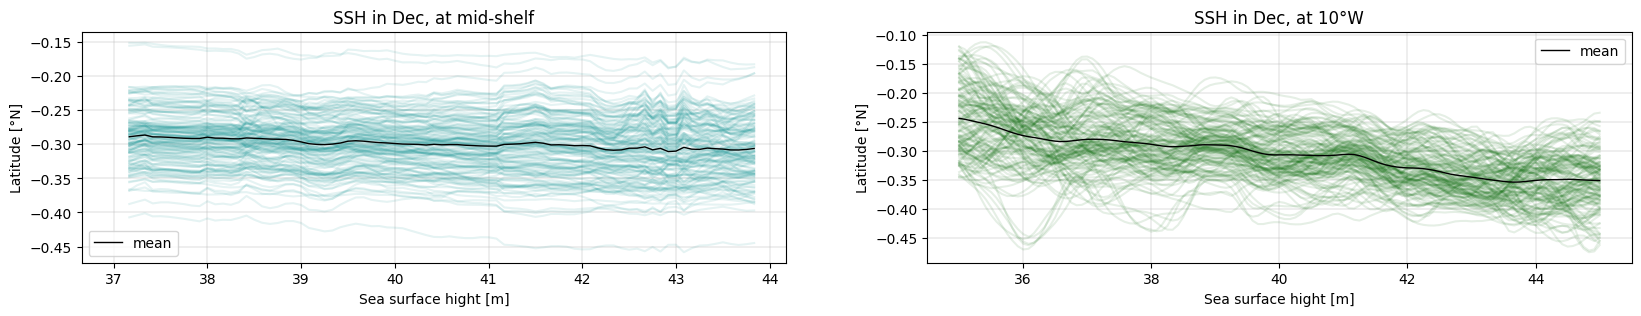

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in np.arange(0,12):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize = (20, 3))
    ax1.plot(SSH.where(SSH.mid_shelf, drop = True).lat, SSH.zos.where((SSH.month == months[i]) & (SSH.mid_shelf == True), drop = True).mean(dim = 'lon').T, color = 'darkcyan', alpha = 0.1);
    ax1.plot(SSH.where(SSH.mid_shelf, drop = True).lat, SSH.zos.where((SSH.month == months[i]) & (SSH.mid_shelf == True), drop = True).mean(dim = 'lon').mean(dim = 'time').T, 'k', linewidth = 1, label = 'mean');
    ax1.set_title(f'SSH in {months[i]}, at mid-shelf')
    ax1.set_xlabel('Sea surface hight [m]')
    ax1.set_ylabel('Latitude [°N]')
    ax1.grid(linewidth = 0.3)
    ax1.legend()

    ax2.plot(SSH.lat, SSH.zos.sel(lon = -10).where((SSH.month == months[i]), drop = True).T, color = 'darkgreen', alpha = 0.1);
    ax2.plot(SSH.lat, SSH.zos.sel(lon = -10).where((SSH.month == months[i]), drop = True).mean(dim = 'time').T, 'k', linewidth = 1, label = 'mean');
    ax2.set_title(f'SSH in {months[i]}, at 10°W')
    ax2.set_xlabel('Sea surface hight [m]')
    ax2.set_ylabel('Latitude [°N]')
    ax2.grid(linewidth = 0.3)
    ax2.legend()

    fig.savefig(f'Iberian_Coast_Upwelling/Figures/SSH/SSH_{i+1:02d}.png', dpi = 300, bbox_inches = 'tight')
    